In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [119]:
# Charger le fichier CSV
file_path = "scaling_results_2.csv"
df = pd.read_csv(file_path)

# Liste des étapes de scaling (toutes les 10 époques)
scaling_epochs = [10, 20, 30, 40, 50]
token_nums = [4, 8, 16, 32, 64]

# Extraire les colonnes nécessaires
epochs = list(df.index)
train_loss = df["train_loss"]
val_loss = df["val_loss"]
test_loss = df["test_loss"]
test_perplexity = df["test_perplexity"]
total_time = df["total_time"]



In [42]:
df

,epoch,train_loss,val_loss,val_perplexity,test_loss,test_perplexity,epoch_time,total_time
0,1,12.583254,12.047901,170740.671875,12.045691,170363.812500,41.671196,41.671196
1,2,11.102040,9.943602,20818.609375,9.936258,20666.253906,42.808647,84.479843
2,3,8.660737,7.548408,1897.718262,7.531388,1865.692993,44.487822,128.967665
3,4,7.060754,6.772394,873.400452,6.745871,850.539673,41.758439,170.726103
4,5,6.678653,6.628895,756.645813,6.598813,734.222839,43.546135,214.272238
5,6,6.603774,6.597259,733.083069,6.566538,710.904297,43.995960,258.268198
6,7,6.581176,6.582308,722.204468,6.553564,701.740784,44.669714,302.937913
7,8,6.569012,6.573973,716.209473,6.544753,695.584900,42.700086,345.637999
8,9,6.561259,6.569186,712.789551,6.539930,692.237671,41.175310,386.813309
9,10,6.556639,6.564295,709.311523,6.535566,689.223694,41.187680,428.000989


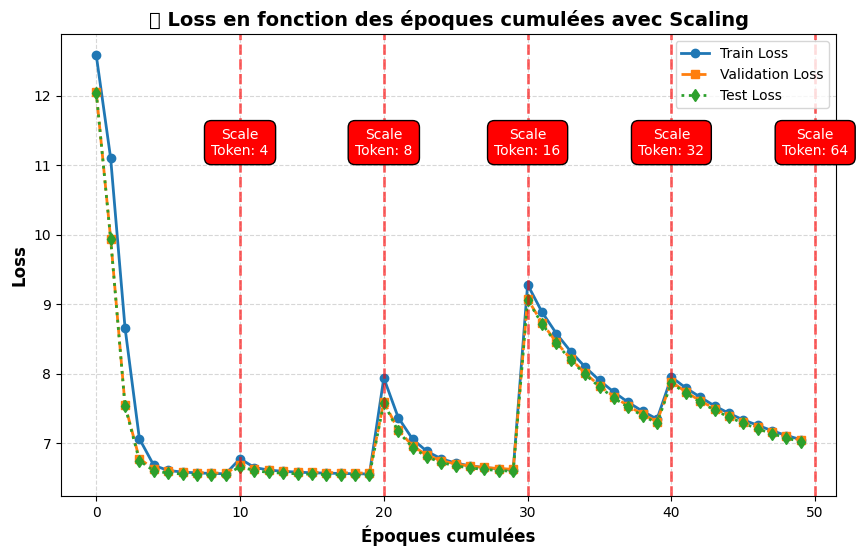

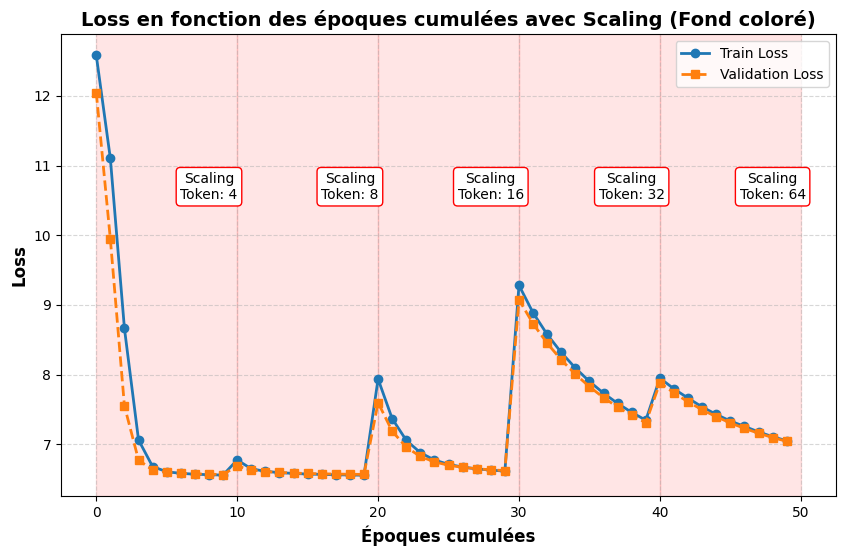

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Tracer les courbes de loss
plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-", linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", marker="s", linestyle="--", linewidth=2)
plt.plot(epochs, test_loss, label="Test Loss", marker="d", linestyle=":", linewidth=2)

# Ajouter des zones de scaling avec des barres épaisses et des annotations
for i, epoch in enumerate(scaling_epochs):
    plt.axvline(x=epoch, color="red", linestyle="--", alpha=0.6, linewidth=2)
    plt.text(epoch, max(train_loss) * 0.9, f"Scale\nToken: {token_nums[i]}", 
             color="white", fontsize=10, ha="center", va="center",
             bbox=dict(facecolor="red", edgecolor="black", boxstyle="round,pad=0.5"))

plt.xlabel("Époques cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Loss", fontsize=12, fontweight="bold")
plt.title("📉 Loss en fonction des époques cumulées avec Scaling", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


plt.figure(figsize=(10, 6))

# Tracer les courbes de loss
plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-", linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", marker="s", linestyle="--", linewidth=2)

# Ajouter des zones de scaling avec un fond coloré
for i, epoch in enumerate(scaling_epochs):
    plt.axvspan(epoch - 10, epoch, color="red", alpha=0.1) 
    plt.text(epoch - 2, max(train_loss) * 0.85, f"Scaling\nToken: {token_nums[i]}", 
             fontsize=10, ha="center", va="center", color="black",
             bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3"))

plt.xlabel("Époques cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Loss", fontsize=12, fontweight="bold")
plt.title("Loss en fonction des époques cumulées avec Scaling (Fond coloré)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


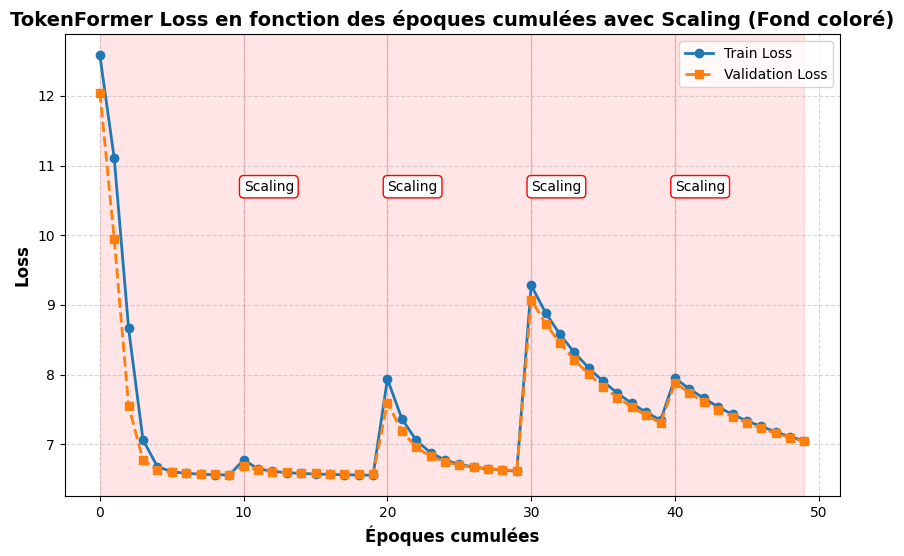

In [125]:
# Supprimer le dernier carré de scaling
#scaling_epochs = scaling_epochs[:-1]

# Tracer les courbes de loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-", linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", marker="s", linestyle="--", linewidth=2)

# Ajouter des zones de scaling avec un fond coloré
for i, epoch in enumerate(scaling_epochs):
    plt.axvspan(epoch - 10, epoch, color="red", alpha=0.1)
    plt.text(epoch, max(train_loss) * 0.85, "Scaling",  # Décalage à droite
             fontsize=10, ha="left", va="center", color="black",
             bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3"))

# Colorier la dernière partie (après le dernier scaling)
plt.axvspan(scaling_epochs[-1], max(epochs), color="red", alpha=0.1)

# Labels et titre
plt.xlabel("Époques cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Loss", fontsize=12, fontweight="bold")
plt.title("TokenFormer Loss en fonction des époques cumulées avec Scaling (Fond coloré)", fontsize=14, fontweight="bold")

# Ajout de la légende et du grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Affichage
plt.show()


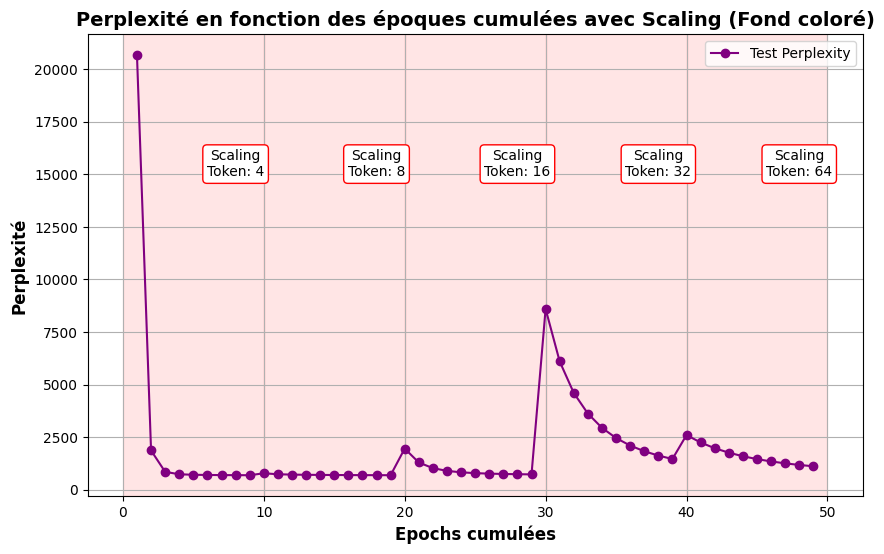

In [106]:
plt.figure(figsize=(10, 6))

# Tracer les courbes de perplexity
plt.plot(epochs[1:], test_perplexity[1:], label="Test Perplexity", marker="o", color="purple")

# Ajouter des zones de scaling avec un fond coloré
text_y_pos = max(test_perplexity) / 11  # Ajuste la hauteur pour qu'elle soit bien visible
for i, epoch in enumerate(scaling_epochs):
    plt.axvspan(epoch - 10, epoch, color="red", alpha=0.1)  
    plt.text(epoch - 2, text_y_pos, f"Scaling\nToken: {token_nums[i]}", 
             fontsize=10, ha="center", va="center", color="black",
             bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3"))





plt.xlabel("Epochs cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction des époques cumulées avec Scaling (Fond coloré)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid()
plt.show()


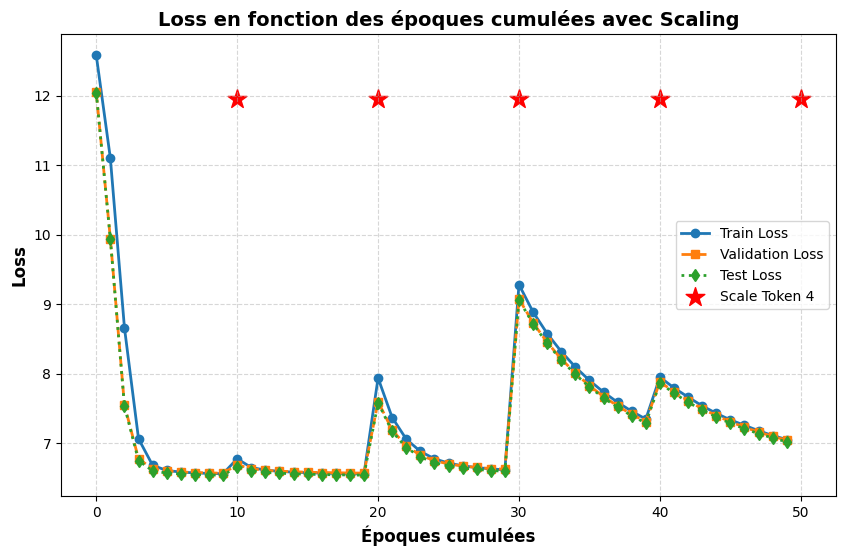

In [ ]:
# --- PLOT 2 : Perplexité en fonction des époques cumulées ---
plt.figure(figsize=(10, 6))
plt.plot(epochs[1:], test_perplexity[1:], label="Test Perplexity", marker="o", color="purple")

# Ajouter des annotations pour le scaling
for i, epoch in enumerate(scaling_epochs):
    plt.axvline(x=epoch, color="red", linestyle="--", alpha=0.6)
    plt.text(epoch, max(test_perplexity), f"Scale: token_num={token_nums[i]}", color="red", fontsize=10, rotation=0)

plt.xlabel("Epochs cumulées")
plt.ylabel("Perplexité")
plt.title("Perplexité en fonction des époques cumulées")
plt.legend()
plt.grid()
plt.show()




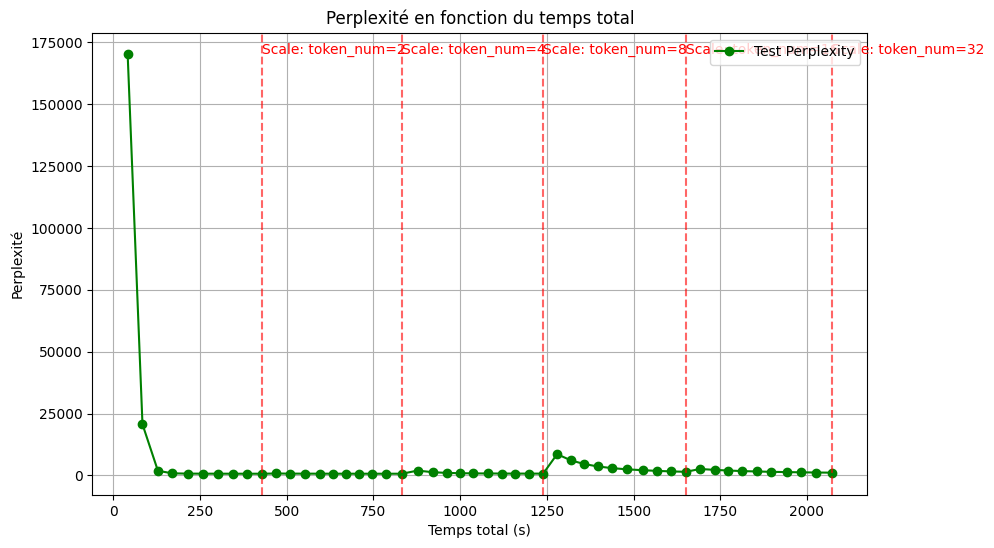

In [61]:
# --- PLOT 3 : Perplexité en fonction du temps total ---
plt.figure(figsize=(10, 6))
plt.plot(total_time, test_perplexity, label="Test Perplexity", marker="o", color="green")

# Ajouter des annotations pour le scaling
for i, epoch in enumerate(scaling_epochs):
    plt.axvline(x=total_time[epoch-1], color="red", linestyle="--", alpha=0.6)
    plt.text(total_time[epoch-1], max(test_perplexity), f"Scale: token_num={token_nums[i]}", color="red", fontsize=10, rotation=0)

plt.xlabel("Temps total (s)")
plt.ylabel("Perplexité")
plt.title("Perplexité en fonction du temps total")
plt.legend()
plt.grid()
plt.show()